In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

**<h1>1.2.1<h1>**

In [104]:
def UniformSum(vec_a, u_size):
    X = np.zeros(u_size)
    for i in range(len(vec_a)):
        u_i = np.random.uniform(-1, 1, u_size)
        X += u_i * vec_a[i]
    return X

(array([  75.,  369.,  926., 1601., 2073., 2063., 1612.,  870.,  349.,
          62.]),
 array([-2.87530162, -2.29539186, -1.71548211, -1.13557235, -0.5556626 ,
         0.02424716,  0.60415691,  1.18406667,  1.76397642,  2.34388618,
         2.92379593]),
 <BarContainer object of 10 artists>)

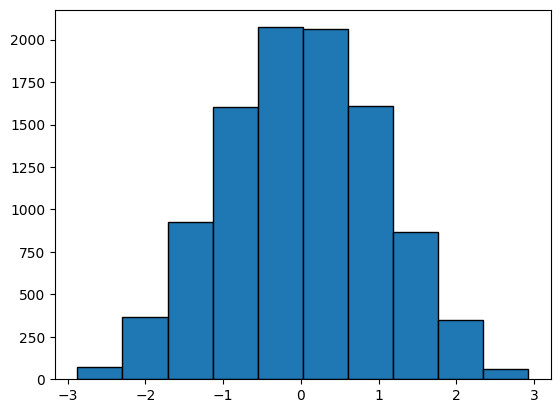

In [105]:
a = np.array([1, 1, 1])
X = UniformSum(a, 10000)

plt.hist(X, edgecolor = 'black')

**<h2>1.2.2<h2>**

In [106]:
tips = sb.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [107]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [108]:
print("Total num of visitors", len(tips))
print("Num of male", len(tips[tips["sex"] == "Male"]))
print("Num of female", len(tips[tips["sex"] == "Female"]))

Total num of visitors 244
Num of male 157
Num of female 87


In [109]:
tips.groupby("sex").mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [110]:
print(tips["day"].unique())

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


In [119]:
days = tips["day"].unique()
days_df = [tips[tips["day"] == days[i]] for i in range(4)]
print(days_df)

[     total_bill   tip     sex smoker  day    time  size
0         16.99  1.01  Female     No  Sun  Dinner     2
1         10.34  1.66    Male     No  Sun  Dinner     3
2         21.01  3.50    Male     No  Sun  Dinner     3
3         23.68  3.31    Male     No  Sun  Dinner     2
4         24.59  3.61  Female     No  Sun  Dinner     4
..          ...   ...     ...    ...  ...     ...   ...
186       20.90  3.50  Female    Yes  Sun  Dinner     3
187       30.46  2.00    Male    Yes  Sun  Dinner     5
188       18.15  3.50  Female    Yes  Sun  Dinner     3
189       23.10  4.00    Male    Yes  Sun  Dinner     3
190       15.69  1.50    Male    Yes  Sun  Dinner     2

[76 rows x 7 columns],      total_bill   tip     sex smoker  day    time  size
19        20.65  3.35    Male     No  Sat  Dinner     3
20        17.92  4.08    Male     No  Sat  Dinner     2
21        20.29  2.75  Female     No  Sat  Dinner     2
22        15.77  2.23  Female     No  Sat  Dinner     2
23        39.42  7.58  

In [170]:
average_bill = [days_df[i]["total_bill"].mean() for i in range(4)]
average_tip = [days_df[i]["tip"].mean() for i in range(4)]
average_size = [days_df[i]["size"].mean() for i in range(4)]

Text(0, 0.5, 'average size')

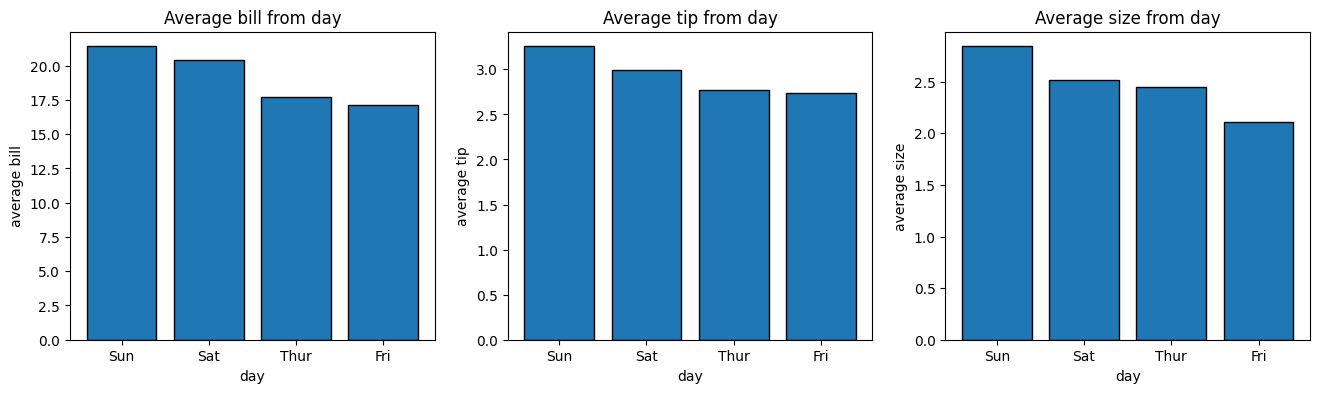

In [174]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].bar(days, average_bill, edgecolor = 'black')
ax[0].set_title("Average bill from day")
ax[0].set_xlabel("day")
ax[0].set_ylabel("average bill")

ax[1].bar(days, average_tip, edgecolor = 'black')
ax[1].set_title("Average tip from day")
ax[1].set_xlabel("day")
ax[1].set_ylabel("average tip")

ax[2].bar(days, average_size, edgecolor = 'black')
ax[2].set_title("Average size from day")
ax[2].set_xlabel("day")
ax[2].set_ylabel("average size")

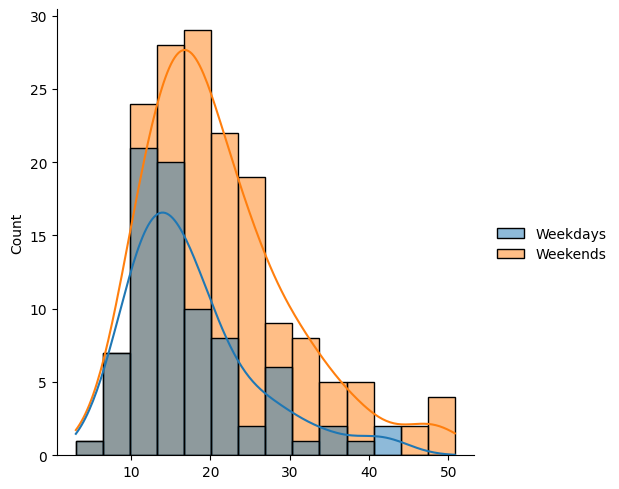

In [180]:
from matplotlib.pyplot import legend

set_1 = tips["total_bill"][(tips["day"] == "Thur") | (tips["day"] == "Fri")]
set_2 = tips["total_bill"][(tips["day"] == "Sat") | (tips["day"] == "Sun")]

sets = {"Weekdays": set_1, "Weekends": set_2}
sb.displot(sets, kde=True)

**<h3>1.2.3<h3>**

In [132]:
db = sb.load_dataset("titanic")
db.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [136]:
age_groups = [len(db[db["age"] <= 10]), len(db[db["age"].between(10, 20)]), len(db[db["age"].between(20, 30)]), len(db[db["age"].between(30, 40)]), len(db[db["age"].between(40, 50)]), len(db[db["age"].between(50, 60)]), len(db[db["age"].between(60, 70)]), len(db[db["age"].between(70, 80)]), len(db[db["age"] > 80])]
age_groups_str = ["1", "2", "3", "4", "5", "6", "7", "8"]
age_groups_dict = dict(zip(age_groups_str, age_groups))

Text(0, 0.5, 'passengers num')

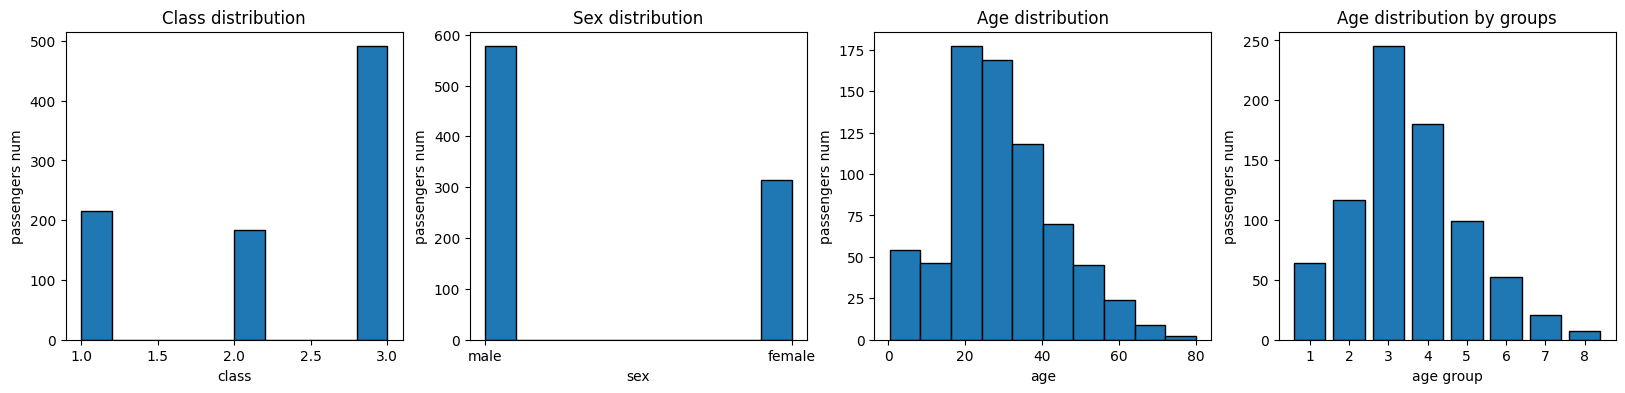

In [138]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

ax[0].hist(db["pclass"], edgecolor = 'black')
ax[0].set_title('Class distribution')
ax[0].set_xlabel('class')
ax[0].set_ylabel('passengers num')

ax[1].hist(db["sex"], edgecolor = 'black')
ax[1].set_title('Sex distribution')
ax[1].set_xlabel('sex')
ax[1].set_ylabel('passengers num')

ax[2].hist(db["age"], edgecolor = 'black')
ax[2].set_title('Age distribution')
ax[2].set_xlabel('age')
ax[2].set_ylabel('passengers num')

ax[3].bar(age_groups_dict.keys(), age_groups_dict.values(), edgecolor = 'black')
ax[3].set_title('Age distribution by groups')
ax[3].set_xlabel('age group')
ax[3].set_ylabel('passengers num')

In [139]:
age_groups_limits = [[0, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70], [70, 80]]

In [140]:
classes_not_survived = []
for i in range(3):
    classes_not_survived.append(len(db[db["survived"] == 0][db["pclass"] == i+1]))

classes_survived = []
for i in range(3):
    classes_survived.append(len(db[db["survived"] == 1][db["pclass"] == i+1]))

gender_not_survived = []
gender_not_survived.append(len(db[db["survived"] == 0][db["sex"] == 'male']))
gender_not_survived.append(len(db[db["survived"] == 0][db["sex"] == 'female']))

gender_survived = []
gender_survived.append(len(db[db["survived"] == 1][db["sex"] == 'male']))
gender_survived.append(len(db[db["survived"] == 1][db["sex"] == 'female']))   

age_group_not_survived = []
for i in range(8):
    age_group_not_survived.append(len(db[db["survived"] == 0][db["age"].between(age_groups_limits[i][0], age_groups_limits[i][1])]))

age_group_survived = []
for i in range(8):
    age_group_survived.append(len(db[db["survived"] == 1][db["age"].between(age_groups_limits[i][0], age_groups_limits[i][1])]))

C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\1762987227.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  classes_not_survived.append(len(db[db["survived"] == 0][db["pclass"] == i+1]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\1762987227.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  classes_survived.append(len(db[db["survived"] == 1][db["pclass"] == i+1]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\1762987227.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_not_survived.append(len(db[db["survived"] == 0][db["sex"] == 'male']))
C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\1762987227.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_not_survived.append(len(db[db["survived"] == 0][db["sex"] == 'female']))
C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\1762987227.py:14: UserWarning: Boolean Series key will be rei

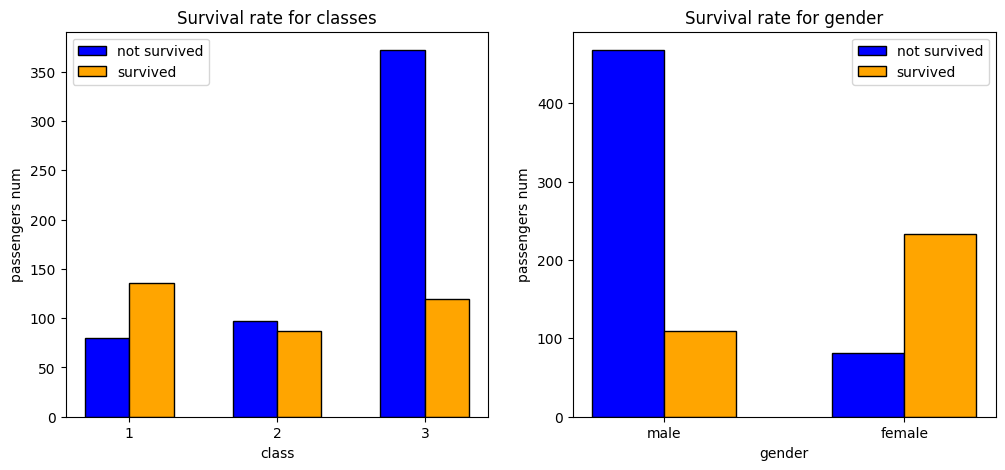

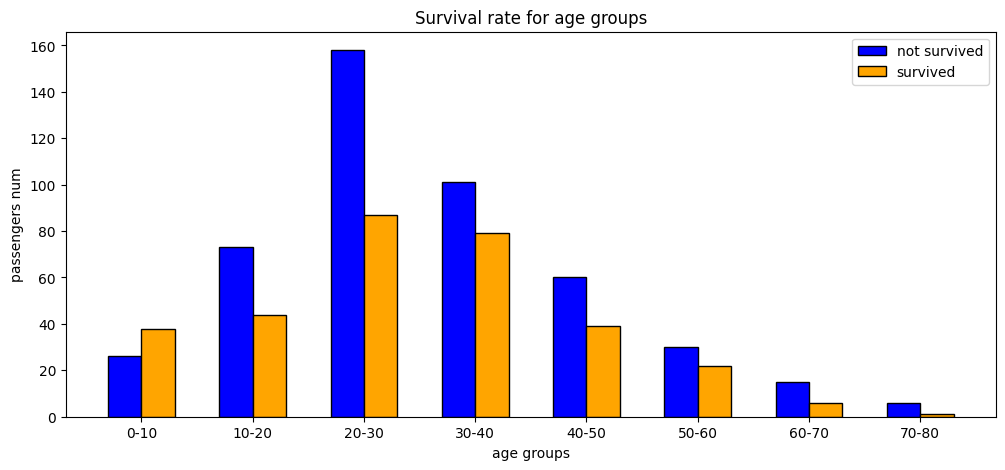

In [141]:
barWidth = 0.3

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(np.arange(1, 4)-barWidth/2, classes_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[0].bar(np.arange(1, 4)+barWidth/2, classes_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[0])
plt.xticks(range(1, 4), ['1', '2', '3'])
ax[0].set_title('Survival rate for classes')
ax[0].set_xlabel('class')
ax[0].set_ylabel('passengers num')
ax[0].legend()

ax[1].bar(np.arange(1, 3)-barWidth/2, gender_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[1].bar(np.arange(1, 3)+barWidth/2, gender_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[1])
plt.xticks(range(1, 3), ['male', 'female'])
ax[1].set_title('Survival rate for gender')
ax[1].set_xlabel('gender')
ax[1].set_ylabel('passengers num')
ax[1].legend()

plt.figure(figsize=(12, 5))
plt.bar(np.arange(1, 9)-barWidth/2, age_group_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
plt.bar(np.arange(1, 9)+barWidth/2, age_group_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.xticks(range(1, 9), ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
plt.title('Survival rate for age groups')
plt.xlabel('age groups')
plt.ylabel('passengers num')
plt.legend()

In [159]:
classes_survival_rate = np.array(classes_survived) / (np.array(classes_survived) + np.array(classes_not_survived))
gender_survival_rate = np.array(gender_survived) / (np.array(gender_survived) + np.array(gender_not_survived))
age_group_survival_rate = np.array(age_group_survived) / (np.array(age_group_survived) + np.array(age_group_not_survived))

print("First class survival rate %g" %round(classes_survival_rate[0], 2), "Second class survival rate %g" %round(classes_survival_rate[1], 2), "Third class survival rate %g" %round(classes_survival_rate[2], 2), sep='\n')
print('', "Male survival rate %g" %round(gender_survival_rate[0], 2), "Female survival rate %g" %round(gender_survival_rate[1], 2), sep='\n')
print('')
for i in range (8):
    print("%s age group survival rate" %age_groups_limits[i], round(age_group_survival_rate[i], 2))

First class survival rate 0.63
Second class survival rate 0.47
Third class survival rate 0.24

Male survival rate 0.19
Female survival rate 0.74

[0, 10] age group survival rate 0.59
[10, 20] age group survival rate 0.38
[20, 30] age group survival rate 0.36
[30, 40] age group survival rate 0.44
[40, 50] age group survival rate 0.39
[50, 60] age group survival rate 0.42
[60, 70] age group survival rate 0.29
[70, 80] age group survival rate 0.14


In [187]:
db.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [219]:
sibsp = db["sibsp"].unique()
sibsp_not_survived = []
for el in sibsp:
    sibsp_not_survived.append(len(db[db["survived"] == 0][db["sibsp"] == el]))
sibsp_survived = []
for el in sibsp:
    sibsp_survived.append(len(db[db["survived"] == 1][db["sibsp"] == el]))

parch = db["parch"].unique()
parch_not_survived = []
for el in parch:
    parch_not_survived.append(len(db[db["survived"] == 0][db["parch"] == el]))
parch_survived = []
for el in parch:
    parch_survived.append(len(db[db["survived"] == 1][db["parch"] == el]))

fare = db["fare"].unique()
fare_bw = np.arange(fare.min(), fare.max()+0.1, (fare.max() - fare.min()) / 5)
fare_not_survived = []
for i in range(len(fare_bw) - 1):
    fare_not_survived.append(len(db[db["survived"] == 0][db["fare"].between(fare_bw[i], fare_bw[i+1])]))
fare_survived = []
for i in range(len(fare_bw) - 1):
    fare_survived.append(len(db[db["survived"] == 1][db["fare"].between(fare_bw[i], fare_bw[i+1])]))    

embarked = db["embark_town"].unique()
embarked_not_survived = []
for el in embarked:
    embarked_not_survived.append(len(db[db["survived"] == 0][db["embark_town"] == el]))
embarked_survived = []
for el in embarked:
    embarked_survived.append(len(db[db["survived"] == 1][db["embark_town"] == el]))    

C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\3984312166.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sibsp_not_survived.append(len(db[db["survived"] == 0][db["sibsp"] == el]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\3984312166.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sibsp_survived.append(len(db[db["survived"] == 1][db["sibsp"] == el]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\3984312166.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parch_not_survived.append(len(db[db["survived"] == 0][db["parch"] == el]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\3984312166.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parch_survived.append(len(db[db["survived"] == 1][db["parch"] == el]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\3984312166.py:21: UserWarning: Boolean Series key will be reindexed to match Data

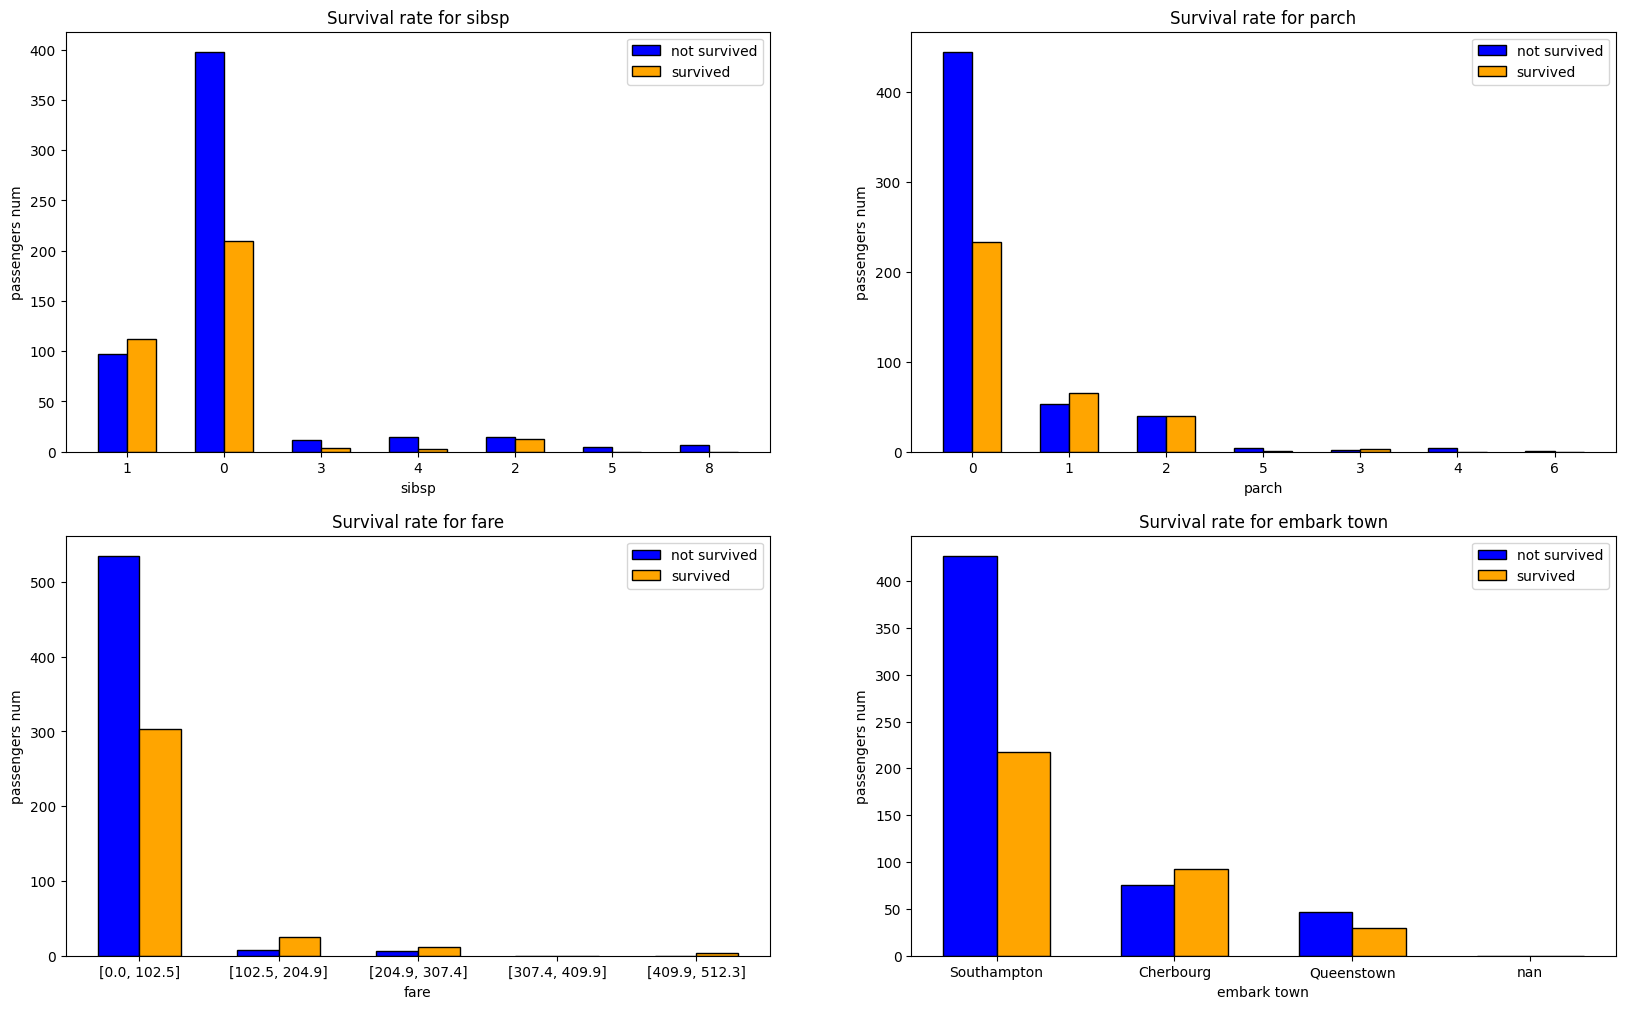

In [223]:
barWidth = 0.3

fig, ax = plt.subplots(2, 2, figsize=(20, 12))

ax[0][0].bar(np.arange(1, len(sibsp)+1)-barWidth/2, sibsp_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[0][0].bar(np.arange(1, len(sibsp)+1)+barWidth/2, sibsp_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[0][0])
plt.xticks(range(1, len(sibsp)+1), sibsp)
ax[0][0].set_title('Survival rate for sibsp')
ax[0][0].set_xlabel('sibsp')
ax[0][0].set_ylabel('passengers num')
ax[0][0].legend()

ax[0][1].bar(np.arange(1, len(parch)+1)-barWidth/2, parch_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[0][1].bar(np.arange(1, len(parch)+1)+barWidth/2, parch_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[0][1])
plt.xticks(range(1, len(parch)+1), parch)
ax[0][1].set_title('Survival rate for parch')
ax[0][1].set_xlabel('parch')
ax[0][1].set_ylabel('passengers num')
ax[0][1].legend()

ax[1][0].bar(np.arange(1, len(fare_bw))-barWidth/2, fare_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[1][0].bar(np.arange(1, len(fare_bw))+barWidth/2, fare_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[1][0])
plt.xticks(range(1, len(fare_bw)), [[round(fare_bw[i], 1), round(fare_bw[i+1], 1)] for i in range(len(fare_bw)-1)])
ax[1][0].set_title('Survival rate for fare')
ax[1][0].set_xlabel('fare')
ax[1][0].set_ylabel('passengers num')
ax[1][0].legend()

ax[1][1].bar(np.arange(1, len(embarked)+1)-barWidth/2, embarked_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[1][1].bar(np.arange(1, len(embarked)+1)+barWidth/2, embarked_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[1][1])
plt.xticks(range(1, len(embarked)+1), embarked)
ax[1][1].set_title('Survival rate for embark town')
ax[1][1].set_xlabel('embark town')
ax[1][1].set_ylabel('passengers num')
ax[1][1].legend()

In [238]:
sibsp_survival_rate = np.array(sibsp_survived) / (np.array(sibsp_survived) + np.array(sibsp_not_survived))
parch_survival_rate = np.array(parch_survived) / (np.array(parch_survived) + np.array(parch_not_survived))
fare_survival_rate = np.array(fare_survived) / (np.array(fare_survived) + np.array(fare_not_survived))
embarked_survival_rate = np.array(embarked_survived) / (np.array(embarked_survived) + np.array(embarked_not_survived))

for i in range(len(sibsp)):
    print("For sibsp = %g, survival rate is %g" %(sibsp[i], round(sibsp_survival_rate[i], 2)))
print('')
for i in range(len(parch)):
    print("For parch = %g, survival rate is %g" %(parch[i], round(parch_survival_rate[i], 2)))
print('')
for i in range(len(fare_bw)-1):
    print("For fare = %s, survival rate is %g" %(str([round(fare_bw[i], 1), round(fare_bw[i+1], 1)]), round(fare_survival_rate[i], 2)))
print('')
for i in range(len(embarked)):
    print("For embark town %s, survival rate is %g" %(embarked[i], round(embarked_survival_rate[i], 2)))

For sibsp = 1, survival rate is 0.54
For sibsp = 0, survival rate is 0.35
For sibsp = 3, survival rate is 0.25
For sibsp = 4, survival rate is 0.17
For sibsp = 2, survival rate is 0.46
For sibsp = 5, survival rate is 0
For sibsp = 8, survival rate is 0

For parch = 0, survival rate is 0.34
For parch = 1, survival rate is 0.55
For parch = 2, survival rate is 0.5
For parch = 5, survival rate is 0.2
For parch = 3, survival rate is 0.6
For parch = 4, survival rate is 0
For parch = 6, survival rate is 0

For fare = [0.0, 102.5], survival rate is 0.36
For fare = [102.5, 204.9], survival rate is 0.76
For fare = [204.9, 307.4], survival rate is 0.65
For fare = [307.4, 409.9], survival rate is nan
For fare = [409.9, 512.3], survival rate is 1

For embark town Southampton, survival rate is 0.34
For embark town Cherbourg, survival rate is 0.55
For embark town Queenstown, survival rate is 0.39
For embark town nan, survival rate is nan


C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\1627979448.py:3: RuntimeWarning: invalid value encountered in true_divide
  fare_survival_rate = np.array(fare_survived) / (np.array(fare_survived) + np.array(fare_not_survived))
C:\Users\timo2\AppData\Local\Temp\ipykernel_8316\1627979448.py:4: RuntimeWarning: invalid value encountered in true_divide
  embarked_survival_rate = np.array(embarked_survived) / (np.array(embarked_survived) + np.array(embarked_not_survived))
